## Test notebook for visualizing images and adjusting thresholding values

In [12]:
#import modules
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import pandas as pd
import math
from scipy import ndimage as ndi
from scipy import stats
import imageio
import nd2
from processingFunctions import *
import warnings
warnings.filterwarnings(action='once')

In [4]:
#path to folder with the images
path="/Users/romina/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/Y1/internship_1/remote_memory/NisslIR_mCherry_PVB_fosG"
#retrieve all files from dataset folder
all_files=[]
for filename in os.listdir(path):
    if filename.endswith(".tif"):
        all_files.append(filename)
    if filename.endswith(".nd2"):
        all_files.append(filename)
print(all_files)

['G_2_0306.nd2', 'Q_1_1306.nd2', 'T_4_2006.nd2', 'T_5_2006.nd2', 'O_1_1306.nd2', 'H_7_1106.nd2', 'H_6_1106.nd2', 'A_7_0306.nd2', 'A_6_0306.nd2', 'E_7_1106.nd2', 'E_6_1106.nd2', 'N_3_1306.nd2', 'N_2_1306.nd2', 'I_5_1106.nd2', 'I_4_1106.nd2', 'J_1_1106.nd2', 'E_1_0906.nd2', 'M_7_1306.nd2', 'M_6_1306.nd2', 'F_3_1106.nd2', 'F_2_1106.nd2', 'C_4_0906.nd2', 'C_5_0906.nd2', 'V_2_2006.nd2', 'V_3_2006.nd2', 'D_2_0906.nd2', 'D_3_0906.nd2', 'W_1_2006.nd2', 'R_4_1306.nd2', 'B_6_0906.nd2', 'F_4_1106.nd2', 'L_2_1106.nd2', 'C_3_0906.nd2', 'C_2_0906.nd2', 'V_5_2006.nd2', 'V_4_2006.nd2', 'S_1_1306.nd2', 'G_6_1106.nd2', 'G_7_1106.nd2', 'D_5_0906.nd2', 'D_4_0906.nd2', 'R_2_1306.nd2', 'R_3_1306.nd2', 'M_1_1106.nd2', 'C_8_0906.nd2', 'B_1_0906.nd2', 'T_3_2006.nd2', 'T_2_2006.nd2', 'A_1_0306.nd2', 'T_8_2006.nd2', 'I_2_1106.nd2', 'I_3_1106.nd2', 'N_4_1306.nd2', 'D_1_0906.nd2', 'G_3_1106.nd2', 'W_3_2006.nd2', 'W_2_2006.nd2', 'B_5_0906.nd2', 'B_4_0906.nd2', 'G_8_1106.nd2', 'J_2_1106.nd2', 'F_1_1106.nd2', 'E_2_09

# Choose the parameters for the image
## We recommend keeping the general parameters as they are (in exception of the channel which will depend on your dataset)
## We recommend inspecting a subset of images and adjusting Fos parameters to fit your dataset 

In [5]:
# General parameters
channelFos=1 #channel where Fos staining is
axis_limit = 60
dist_thresh=25
axis_min=11
circ=0.98
axis_ratio= 0.48

#Fos parameters 
fos_thresh={
    "is_intensity_low":0, #use 0 if you have images with a high background, change to 1 if your images have low intensity and you wish to enhance contrast 
    "top_thresh":25, #this is gonna be the threshold for images with higher background, adjust it based on your settings
    "mid_thresh":9,#this is gonna be the threshold for images with medium background, adjust it based on your settings
    "low_thresh":30, #this is gonna be the threshold for images with lower background, adjust it based on your settings
    "high_int_thresh":92,
    "low_int_thresh":30
}

In [6]:
#get intensity cut off values for fos filtering function
fos_ints= intensitySaver(path, all_files, channelFos, fos_thresh.get("is_intensity_low")).getIntensityValues()
print (fos_ints)

/Users/romina/Documentos/FosCounter/FosCounter/processingFunctions.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ints= ints.append(c_series, ignore_index=True)
/Users/romina/Documentos/FosCounter/FosCounter/processingFunctions.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ints= ints.append(c_series, ignore_index=True)
/Users/romina/Documentos/FosCounter/FosCounter/processingFunctions.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ints= ints.append(c_series, ignore_index=True)
/Users/romina/Documentos/FosCounter/FosCounter/processingFunctions.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ints= ints.append(c

{'low_int': 0.0029424536994399203, 'high_int': 0.04540369218543669, 'int_cutoff_up': 4.132249994518226, 'int_cutoff': 2.016993603919464, 'int_cutoff_down': 1.6385808273299955}


/Users/romina/Documentos/FosCounter/FosCounter/processingFunctions.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ints= ints.append(c_series, ignore_index=True)


In [7]:
#select one image to visualize if the thresholding is correct
test_image= "V_1_2006.nd2" #name of image file
data= path + "/"+ test_image #open an image here to examinate (note that you're gonna have to open a few to see how your images vary from each other)
fos_t, stacks=getImg(channelFos, data)
print(stacks) #will print the number of planes of the z-stack

5


## visualize how your images look after being thresholded with the previous parameters

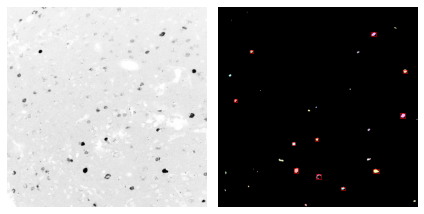

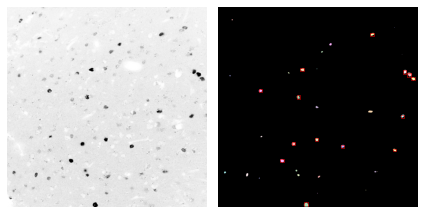

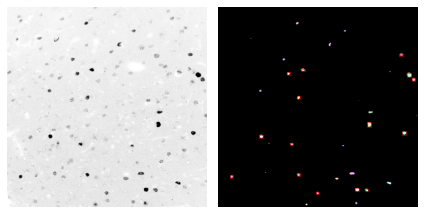

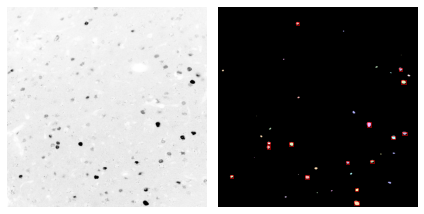

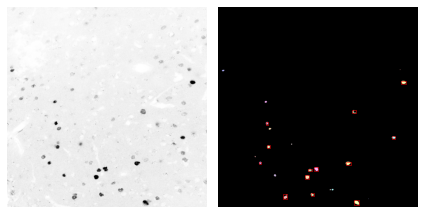

In [8]:
# visually inspect the chosen image and how it is being thresholded, and then adjust your thresholding values accordingly 
for i in range(stacks):
    fos_cc=fos_t[i]
    filt= getThresh(fos_cc).threshFos(fos_thresh, fos_ints)
    show_labels(filt, fos_cc, circ, axis_min, axis_limit, axis_ratio)

In [13]:
# print the counts for Fos cells
blobs_fos= getCoords(fos_cc, stacks, circ, axis_ratio, axis_min, axis_limit).coordsFos(fos_thresh, fos_ints)
overlap=getOverlap(stacks, dist_thresh).overlap_coords(blobs_fos)
print(len(blobs_fos)-len(overlap))

TypeError: Only 2-D and 3-D images supported.

In [ ]:
#get values of each plane to assess where to adjust values
intInfo= pd.DataFrame(columns=["stack","classifier value", "25 p", "99 p", "threshold applied"])
for i in range(stacks):
    denoise=sk.restoration.denoise_wavelet(fos_t[i])
    blurred = sk.filters.gaussian(denoise, sigma=2.0)
    if fos_thresh.get("is_intensity_low") ==0:
        prepro=blurred
    else:
        prepro= sk.exposure.equalize_adapthist(blurred, kernel_size=127,clip_limit=0.01,  nbins=256)
    thresh=sk.filters.threshold_otsu(prepro)
    if np.percentile(prepro, 25)<= fos_ints.get("low_int"): 
        cat= "high_int_thresh"
    elif np.percentile(prepro,99)>= fos_ints.get("high_int"):
        cat= "low_int_thresh"
    else:
        if thresh/np.median(prepro)>=fos_ints.get("int_cutoff_up"):
            cat= "no thresh"
        else:
            if thresh/np.median(prepro)<=fos_ints.get("int_cutoff"): 
                if thresh/np.median(prepro)<=fos_ints.get("int_cutoff_down"): 
                    cat= "low_thresh"
                else:
                    cat= "top thresh"
            else:
                cat= "mid thresh"
    val_list= [i, thresh/np.median(prepro),np.percentile(prepro, 25), np.percentile(prepro, 99), cat]
    c_series = pd.Series(val_list, index = intInfo.columns)
    intInfo = intInfo.append(c_series, ignore_index=True)
print(intInfo)
    

/var/folders/h_/b9xgqnhx4tbbl8m7l9lshxvr0000gn/T/ipykernel_32565/3912460422.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intInfo = intInfo.append(c_series, ignore_index=True)
/var/folders/h_/b9xgqnhx4tbbl8m7l9lshxvr0000gn/T/ipykernel_32565/3912460422.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intInfo = intInfo.append(c_series, ignore_index=True)
/var/folders/h_/b9xgqnhx4tbbl8m7l9lshxvr0000gn/T/ipykernel_32565/3912460422.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intInfo = intInfo.append(c_series, ignore_index=True)
/var/folders/h_/b9xgqnhx4tbbl8m7l9lshxvr0000gn/T/ipykernel_32565/3912460422.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

  stack  classifier value      25 p      99 p threshold applied
0     0          3.407704  0.004557  0.019243        mid thresh
1     1          3.795744  0.004349  0.019881        mid thresh
2     2          4.071671  0.003982  0.021429        mid thresh
3     3          4.708585  0.003523  0.018790         no thresh
4     4          5.125087  0.002905  0.016550   high_int_thresh


/var/folders/h_/b9xgqnhx4tbbl8m7l9lshxvr0000gn/T/ipykernel_32565/3912460422.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intInfo = intInfo.append(c_series, ignore_index=True)


## once you have decided on the thresholding values copy them on the main file and run the script to obtain the counts for the dataset